<a href="https://colab.research.google.com/github/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/blob/main/Modulo_11_Agrupacion/BA_Agrupacion_Sklearn_Hierarchical_clustering_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

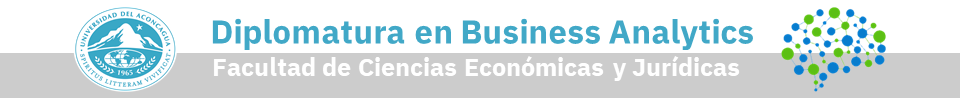

</center>

<center>
<font color="#41a8c7">
<h2><b>
Hierarchical clustering

</font>
</center>

## Carga de librerías necesarias

### Para el tratamiento de los datos

In [ ]:
import pandas as pd #para la creación del dataframe y limpieza de los datos
import numpy as np

### Para gráficos

In [ ]:
import plotly.express as px
import plotly.figure_factory as ff
import altair as alt
import matplotlib.pyplot as plt

### Para preprocesamiento de datos y modelo

In [ ]:
import sklearn
from sklearn import cluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import scale
import sklearn.metrics as metrics #para la medición de los algoritmos
from sklearn.metrics import silhouette_score

## Extracción de Datos - Creación del DataFrame

In [ ]:
url = "https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Modulo_11_Agrupacion/"

In [ ]:
archivo = "clientes01.csv"

In [ ]:
clientes = pd.read_csv(url+archivo) #los datos están separados por comas
clientes #vista del dataframe

,ID,Trabajo,Edad,Salario,Compra
0,0,1,19,19000,No
1,1,1,35,20000,No
2,2,0,26,43000,No
3,3,0,27,57000,No
4,4,1,19,76000,No
...,...,...,...,...,...
395,395,0,46,41000,Si
396,396,1,51,23000,Si
397,397,0,50,20000,Si
398,398,1,36,33000,No


El dataframe contiene 5 variables y 400 observaciones. 

Las variables indican:
- **ID:** La identificación del cliente
- **Trabajo:** Corresponde 1 cuando es dependiente y 0 cuando es independiente
- **Edad:** La edad del cliente
- **Salario:** El salario estimado del cliente
- **Compra:** Si, cuando el cliente ha comprado y no cuando no lo ha hecho.

Pero para el desarrollo del algoritmo se simplificara a un problema bidimensional, seleccionando las variables de edad y salario.

## Eliminando variables

In [ ]:
clientes.info() #visualizacion de los tipos de datos del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       400 non-null    int64 
 1   Trabajo  400 non-null    int64 
 2   Edad     400 non-null    int64 
 3   Salario  400 non-null    int64 
 4   Compra   400 non-null    object
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
clientes = clientes.drop(columns=["ID","Trabajo","Compra"]) #se elimina la variable no relevante
clientes #vista del dataframe

,Edad,Salario
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


# Evaluando el Algoritmo

## Algoritmo K-means

In [ ]:
ac = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

In [ ]:
ac.fit(clientes)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [ ]:
labels = ac.labels_

In [ ]:
labels

array([0, 0, 0, 2, 2, 2, 2, 3, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0,
       2, 0, 2, 0, 3, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0, 2, 2, 1, 2, 2,
       0, 2, 2, 2, 2, 0, 0, 1, 0, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 1, 0, 2,
       2, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 2, 2, 2, 3, 0, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0,
       2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0,
       0, 0, 2, 2, 0, 3, 1, 2, 0, 0, 2, 2, 0, 2, 3, 0, 2, 1, 1, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 0, 2, 3, 2, 1, 0, 3, 1, 3, 0, 1, 3, 0, 2, 0, 1, 2, 2, 1, 3,
       2, 2, 3, 1, 2, 0, 1, 3, 2, 2, 3, 0, 1, 2, 1, 2, 2, 2, 2, 3, 3, 2,
       2, 1, 2, 3, 0, 1, 0, 1, 0, 0, 3, 3, 0, 2, 2, 2, 1, 3, 2, 3, 1, 2,
       2, 1, 2, 2, 3, 2, 3, 2, 0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 3, 2,
       2, 3, 2, 2, 3, 2, 0, 2, 2, 2, 2, 1, 2, 1, 0,

## Métricas

In [ ]:
metrics.calinski_harabasz_score(clientes, labels)

1249.6394834936352

In [ ]:
metrics.silhouette_score(clientes, labels)

0.5782347409293481

In [ ]:
metrics.davies_bouldin_score(clientes, labels)

0.4756912440471305

In [ ]:
clientes['cluster'] = labels

## Graficos

### Altair

In [ ]:
alt.Chart(clientes).mark_circle().encode(x="Edad", y="Salario", color='cluster:N').interactive()

alt.Chart(...)

In [ ]:
scatter01 = alt.Chart(clientes).mark_circle().encode(x="Edad", y="Salario", color='cluster:N').interactive()

### Plotly

In [ ]:
fig = px.scatter(clientes, 
              x="Edad", 
              y="Salario",
              title="Hierarchical clustering",
              template="gridon",
              color="cluster")

fig.show()

### Dendrograma

In [ ]:
clientes.head(3)

,Edad,Salario,cluster
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [ ]:
clientes.drop(columns="cluster",inplace=True)

In [ ]:
import scipy.cluster.hierarchy as sch

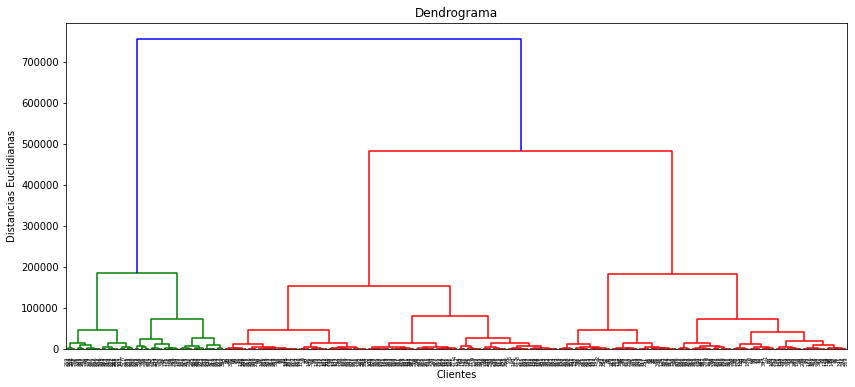

In [ ]:
plt.figure(figsize=(14, 6))

dendrogram = sch.dendrogram(sch.linkage(clientes, method = "ward"))

plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias Euclidianas')

plt.show()